In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import Date

In [5]:
database_path = "../Resources/hawaii.sqlite"

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connect = engine.connect()

inspect = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
inspect.get_table_names()

# reflect the tables
columns_measure = inspect.get_columns("measurement")
for column in columns_measure:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns_station = inspect.get_columns("station")
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# View all of the classes found by automap
Base.classes.keys()

['measurement', 'station']

In [9]:
# Map measurements class
Measure = Base.classes.measurement
Measure


sqlalchemy.ext.automap.measurement

In [10]:
# Map station class
Station = Base.classes.station
Station


sqlalchemy.ext.automap.station

In [11]:
# Create session link from python to DB
session = Session(bind=engine)
session

In [12]:
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
measure = pd.read_sql("SELECT * FROM measurement", connect)
measure.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [14]:
station = pd.read_sql("SELECT * FROM station", connect)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
#prev_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#prev_yr 
last_date = session.query(func.max(Measure.date)).first()
last_date


('2017-08-23',)

In [28]:
# Perform a query to retrieve the date and precipitation scores
rain_data = session.query(Measure.date, Measure.prcp)\
    .filter(Measure.date > '2016-08-22')\
    .filter(Measure.date <= '2017-08-23')\
    .order_by(Measure.date).all()
rain_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [34]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(rain_data, columns=['Date', 'Precipitation'])

# Index by date column
precip.set_index('Date', inplace=True)
precip

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [35]:
# Sort dataframe by date
precip.sort_index()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


<AxesSubplot:xlabel='Date'>

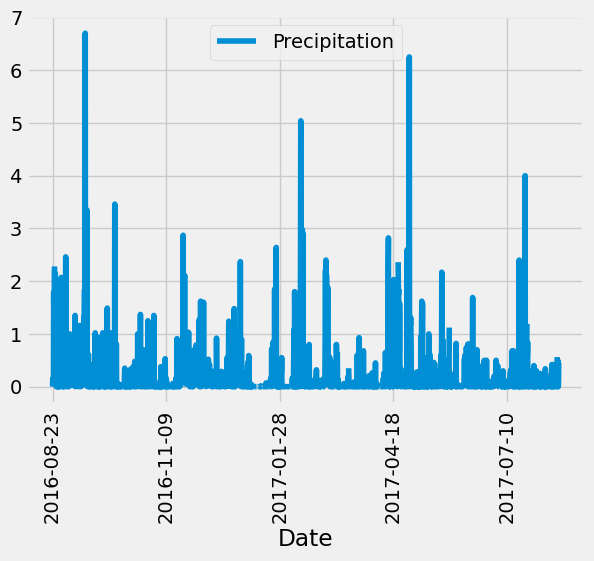

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
#rainfall = precip.plot(figsize=(7,5), ylim=(0,7), title = 'Precipitation Over 12 Months'
#rainfall.set_ylabel("Date (Year-Month)")
#rainfall.set_xlabel("Inches)
#rainfall.grid()
#rainfall.plt.savefig("Images/precipitation.png")
#plt.show
precip.plot(rot=90)

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number stations in the dataset
station_ct = session.query(func.count(Station.station)).all()
station_ct

[(9,)]

In [56]:
Station.unique()

AttributeError: type object 'station' has no attribute 'unique'

In [57]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Station.query.order_by(Station.total.desc()).all()

AttributeError: type object 'station' has no attribute 'query'

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [24]:
# Close Session
session.close()